# Comparing economies across different countries 2018-2023 june.

We are going to compare between different countries:

1. GDP growth per capita
2. Unemployment
3. inflation CPI
4. Interest rates banks

What is GDP?: https://www.youtube.com/watch?v=mjJmo5mN5yA&list=PL-uRhZ_p-BM52EbMG1NR1ZfG9tEvcxE4u&index=1

It was very interesting studying this video of GDP from marginal revolution university: https://www.youtube.com/watch?v=rGqhTQyY6g4

GPD per capita and the standard of living: https://www.youtube.com/watch?v=Z0qHA93oOSc

This is How I will stratify this analysis:

1. Extract the data from different countries: I will use the **datareader module** in python to extract data from the **FRED** webpage and other sources like world bank webpage.

2. Perform technical analysis to discover insights from the part of EDA (exploratory data analysis)

In [1]:
# let's import the libraries we are going to use
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for visualization we can see the styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use("seaborn-dark-palette")
plt.style.use("fivethirtyeight")

# USA

In [4]:
# Choose the data you want to extract.
indicators = ['NYGDPPCAPKDUSA', 'UNRATE', 'CPIAUCSL', 'FEDFUNDS']

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_us = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_us.head()

,NYGDPPCAPKDUSA,UNRATE,CPIAUCSL,FEDFUNDS
DATE,,,,
2018-01-01,59607.39366,4.0,248.859,1.41
2018-02-01,NaN,4.1,249.529,1.42
2018-03-01,NaN,4.0,249.577,1.51
2018-04-01,NaN,4.0,250.227,1.69
2018-05-01,NaN,3.8,250.792,1.70


Let's rename the columns for readability 

In [5]:
data_us = data_us.rename(columns = {"NYGDPPCAPKDUSA": "gdp", 
                                    "UNRATE": "unemployment", 
                                    "CPIAUCSL": "cpi", 
                                    "FEDFUNDS": "interest_rate"})

In [6]:
data_us.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,59607.39366,4.0,248.859,1.41
2018-02-01,NaN,4.1,249.529,1.42
2018-03-01,NaN,4.0,249.577,1.51
2018-04-01,NaN,4.0,250.227,1.69
2018-05-01,NaN,3.8,250.792,1.70


**cleaning the data**

In [7]:
# Identifying null values
data_us.isnull().sum()

gdp              61
unemployment      0
cpi               0
interest_rate     0
dtype: int64

Let's apply the forward fullfill.

In [8]:
data_us.fillna(method = "ffill").isnull().sum()

gdp              0
unemployment     0
cpi              0
interest_rate    0
dtype: int64

In [9]:
data_us = data_us.fillna(method = "ffill")
data_us.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,59607.39366,4.0,248.859,1.41
2018-02-01,59607.39366,4.1,249.529,1.42
2018-03-01,59607.39366,4.0,249.577,1.51
2018-04-01,59607.39366,4.0,250.227,1.69
2018-05-01,59607.39366,3.8,250.792,1.70


In [10]:
data_us["gdp"].value_counts()

62866.714391    18
59607.393660    12
60698.011299    12
58451.606715    12
61829.845627    12
Name: gdp, dtype: int64

# We are going to create the pipeline with a function.

We are going to change the name of all the four columns for each dataframe and fill the missing values with the previous rows with the following countries.

In [11]:
def clean_data(data):
    
    data = data.rename(columns = {data.columns[0]: "gdp", 
                                  data.columns[1]: "unemployment", 
                                  data.columns[2]: "cpi", 
                                  data.columns[3]: "interest_rate"})
    
    data = data.fillna(method = "ffill")
    
    return data

# United Kingdom

In [12]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDGBR", "LRHUTTTTGBM156S",'GBRCPIALLMINMEI', "IRSTCI01GBM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_uk = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_uk.head()

,NYGDPPCAPKDGBR,LRHUTTTTGBM156S,GBRCPIALLMINMEI,IRSTCI01GBM156N
DATE,,,,
2018-01-01,47006.142927,4.2,104.5,0.4631
2018-02-01,NaN,4.2,104.9,0.4634
2018-03-01,NaN,4.2,105.1,0.4637
2018-04-01,NaN,4.2,105.5,0.4617
2018-05-01,NaN,4.0,105.9,0.4529


apply the function clean_data I wrote at the beginning.

In [13]:
data_uk = clean_data(data_uk)
data_uk.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,47006.142927,4.2,104.5,0.4631
2018-02-01,47006.142927,4.2,104.9,0.4634
2018-03-01,47006.142927,4.2,105.1,0.4637
2018-04-01,47006.142927,4.2,105.5,0.4617
2018-05-01,47006.142927,4.0,105.9,0.4529


# China

In [14]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDCHN", "LMUNRRTTCNQ156S", "CPALTT01CNM659N", "IRSTCB01CNM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_china = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_china.head()

,NYGDPPCAPKDCHN,LMUNRRTTCNQ156S,CPALTT01CNM659N,IRSTCB01CNM156N
DATE,,,,
2018-01-01,9619.20998,NaN,1.5,2.9
2018-02-01,NaN,NaN,2.9,2.9
2018-03-01,NaN,NaN,2.1,2.9
2018-04-01,NaN,NaN,1.8,2.9
2018-05-01,NaN,NaN,1.8,2.9


In [15]:
data_china.isnull().sum()

NYGDPPCAPKDCHN     59
LMUNRRTTCNQ156S    64
CPALTT01CNM659N     0
IRSTCB01CNM156N     1
dtype: int64

In [16]:
from pandas_datareader import wb

# Fred don't have recent information for unemployment rates in china
# so we are going to use world bank webpage instead
wb.download(indicator='SL.UEM.TOTL.ZS', country="CN", start=2018, end=2023)

SL.UEM.TOTL.ZS
country year                
China   2022           4.886
        2021           4.550
        2020           5.000
        2019           4.560
        2018           4.310

# India

In [17]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDIND", "SLUEM1524ZSIND", "INDCPIALLMINMEI", "IRSTCB01INM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_india = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_india.head()

,NYGDPPCAPKDIND,SLUEM1524ZSIND,INDCPIALLMINMEI,IRSTCB01INM156N
DATE,,,,
2018-01-01,1891.138424,26.353,110.168951,6.25
2018-02-01,NaN,NaN,109.786420,6.25
2018-03-01,NaN,NaN,109.786420,6.25
2018-04-01,NaN,NaN,110.168951,6.25
2018-05-01,NaN,NaN,110.551482,6.25


In [18]:
data_india.isnull().sum()

NYGDPPCAPKDIND     59
SLUEM1524ZSIND     59
INDCPIALLMINMEI     0
IRSTCB01INM156N     0
dtype: int64

In [19]:
# This is the unemployment rates for india on the world bank webpage
wb.download(indicator = "SL.UEM.TOTL.ZS", country = "IN", start = 2018, end = 2022)

SL.UEM.TOTL.ZS
country year                
India   2022           7.330
        2021           7.713
        2020          10.195
        2019           6.510
        2018           7.650

# Germany

In [20]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDDEU", "LMUNRRTTDEM156S", "CPALTT01DEM657N", "IR3TIB01DEM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_germany = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_germany.head()

,NYGDPPCAPKDDEU,LMUNRRTTDEM156S,CPALTT01DEM657N,IR3TIB01DEM156N
DATE,,,,
2018-01-01,42928.741237,5.4,-0.584795,-0.3285
2018-02-01,NaN,5.4,0.294118,-0.3285
2018-03-01,NaN,5.3,0.586510,-0.3279
2018-04-01,NaN,5.3,0.194363,-0.3285
2018-05-01,NaN,5.2,0.775946,-0.3252


In [21]:
data_germany = clean_data(data_germany)
data_germany.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,42928.741237,5.4,-0.584795,-0.3285
2018-02-01,42928.741237,5.4,0.294118,-0.3285
2018-03-01,42928.741237,5.3,0.586510,-0.3279
2018-04-01,42928.741237,5.3,0.194363,-0.3285
2018-05-01,42928.741237,5.2,0.775946,-0.3252


# Japan

In [22]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDJPN", "LRUN64TTJPM156S", "JPNCPIALLMINMEI", "IRSTCB01JPM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_japan = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_japan.head()

,NYGDPPCAPKDJPN,LRUN64TTJPM156S,JPNCPIALLMINMEI,IRSTCB01JPM156N
DATE,,,,
2018-01-01,36138.529082,2.6,101.298040,0.3
2018-02-01,NaN,2.7,101.298040,0.3
2018-03-01,NaN,2.7,100.992619,0.3
2018-04-01,NaN,2.6,100.890812,0.3
2018-05-01,NaN,2.3,101.094426,0.3


In [23]:
data_japan = clean_data(data_japan)
data_japan.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,36138.529082,2.6,101.298040,0.3
2018-02-01,36138.529082,2.7,101.298040,0.3
2018-03-01,36138.529082,2.7,100.992619,0.3
2018-04-01,36138.529082,2.6,100.890812,0.3
2018-05-01,36138.529082,2.3,101.094426,0.3


# Canada

In [24]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDCAN", "LRUN64TTCAM156S", "CPALCY01CAM661N", "IRSTPI01CAM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_canada = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_canada.head()

,NYGDPPCAPKDCAN,LRUN64TTCAM156S,CPALCY01CAM661N,IRSTPI01CAM156N
DATE,,,,
2018-01-01,44917.483728,5.9,102.648962,3.30
2018-02-01,NaN,6.0,103.209448,3.45
2018-03-01,NaN,5.8,103.369587,3.45
2018-04-01,NaN,5.9,103.609795,3.45
2018-05-01,NaN,6.0,103.769934,3.45


In [25]:
data_canada = clean_data(data_canada)
data_canada.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,44917.483728,5.9,102.648962,3.30
2018-02-01,44917.483728,6.0,103.209448,3.45
2018-03-01,44917.483728,5.8,103.369587,3.45
2018-04-01,44917.483728,5.9,103.609795,3.45
2018-05-01,44917.483728,6.0,103.769934,3.45


# Australia

In [26]:
# Choose the data you want to extract.
indicators = ["NYGDPPCAPKDAUS", "LRUNTTTTAUM156S", "IR3TBB01AUM156N", "IRSTCI01AUM156N"]

# Set the start and end dates for the data.
start_date = '2018-01-01'
end_date = '2023-06-01'

# Extract the data from FRED.
data_australia = pdr.DataReader(indicators, 'fred', start_date, end_date)

# Print the data.
data_australia.head()

,NYGDPPCAPKDAUS,LRUNTTTTAUM156S,IR3TBB01AUM156N,IRSTCI01AUM156N
DATE,,,,
2018-01-01,58479.503547,5.510378,1.79,1.5
2018-02-01,NaN,5.570778,1.77,1.5
2018-03-01,NaN,5.515009,1.93,1.5
2018-04-01,NaN,5.528219,2.06,1.5
2018-05-01,NaN,5.386624,1.96,1.5


In [27]:
data_australia = clean_data(data_australia)
data_australia.head()

,gdp,unemployment,cpi,interest_rate
DATE,,,,
2018-01-01,58479.503547,5.510378,1.79,1.5
2018-02-01,58479.503547,5.570778,1.77,1.5
2018-03-01,58479.503547,5.515009,1.93,1.5
2018-04-01,58479.503547,5.528219,2.06,1.5
2018-05-01,58479.503547,5.386624,1.96,1.5


# Now it is time to create a multidimensional dataframe.

In [28]:
# these will be the keys for the outer level of the columns
tickers = ["US", "UK", "Ger", "JPY", "CAD", "AUD"]

# we are going to concatenate and set the outer level with the keys parameter
macro_data = pd.concat([data_us, data_uk, data_germany, data_japan, data_canada, data_australia], 
                       keys = tickers, axis = 1)

macro_data.head()

US                                                UK  \
                    gdp unemployment      cpi interest_rate           gdp   
DATE                                                                        
2018-01-01  59607.39366          4.0  248.859          1.41  47006.142927   
2018-02-01  59607.39366          4.1  249.529          1.42  47006.142927   
2018-03-01  59607.39366          4.0  249.577          1.51  47006.142927   
2018-04-01  59607.39366          4.0  250.227          1.69  47006.142927   
2018-05-01  59607.39366          3.8  250.792          1.70  47006.142927   

                                                       Ger               ...  \
           unemployment    cpi interest_rate           gdp unemployment  ...   
DATE                                                                     ...   
2018-01-01          4.2  104.5        0.4631  42928.741237          5.4  ...   
2018-02-01          4.2  104.9        0.4634  42928.741237          5.4  ...   
2018-03-01          4.2  105.1        0.4637  42928.741237          5.3  ...   
2018-04-01          4.2  105.5        0.4617  42928.741237          5.3  ...   
2018-05-01          4.0  105.9        0.4529  42928.741237          5.2  ...   

                   JPY                         CAD                           \
                   cpi interest_rate           gdp unemployment         cpi   
DATE                                                                          
2018-01-01  101.298040           0.3  44917.483728          5.9  102.648962   
2018-02-01  101.298040           0.3  44917.483728          6.0  103.209448   
2018-03-01  100.992619           0.3  44917.483728          5.8  103.369587   
2018-04-01  100.890812           0.3  44917.483728          5.9  103.609795   
2018-05-01  101.094426           0.3  44917.483728          6.0  103.769934   

                                   AUD                                   
           interest_rate           gdp unemployment   cpi interest_rate  
DATE                                                                     
2018-01-01          3.30  58479.503547     5.510378  1.79           1.5  
2018-02-01          3.45  58479.503547     5.570778  1.77           1.5  
2018-03-01          3.45  58479.503547     5.515009  1.93           1.5  
2018-04-01          3.45  58479.503547     5.528219  2.06           1.5  
2018-05-01          3.45  58479.503547     5.386624  1.96           1.5  

[5 rows x 24 columns]

In [29]:
# we are just going to level the names of the multidimensional columns
macro_data.columns.names = ["country", "indicators"]

In [30]:
# here we are going to fill the missing values wuth the previous one with the ffill method
# i decided to do it like this since we are taking into consideration the previous report 
# when the next month we did not have a report, in the case of GDP we are considering from an annual basis.
macro_data = macro_data.fillna(method = "ffill")

In [31]:
macro_data.head()

country              US                                                UK  \
indicators          gdp unemployment      cpi interest_rate           gdp   
DATE                                                                        
2018-01-01  59607.39366          4.0  248.859          1.41  47006.142927   
2018-02-01  59607.39366          4.1  249.529          1.42  47006.142927   
2018-03-01  59607.39366          4.0  249.577          1.51  47006.142927   
2018-04-01  59607.39366          4.0  250.227          1.69  47006.142927   
2018-05-01  59607.39366          3.8  250.792          1.70  47006.142927   

country                                                Ger               ...  \
indicators unemployment    cpi interest_rate           gdp unemployment  ...   
DATE                                                                     ...   
2018-01-01          4.2  104.5        0.4631  42928.741237          5.4  ...   
2018-02-01          4.2  104.9        0.4634  42928.741237          5.4  ...   
2018-03-01          4.2  105.1        0.4637  42928.741237          5.3  ...   
2018-04-01          4.2  105.5        0.4617  42928.741237          5.3  ...   
2018-05-01          4.0  105.9        0.4529  42928.741237          5.2  ...   

country            JPY                         CAD                           \
indicators         cpi interest_rate           gdp unemployment         cpi   
DATE                                                                          
2018-01-01  101.298040           0.3  44917.483728          5.9  102.648962   
2018-02-01  101.298040           0.3  44917.483728          6.0  103.209448   
2018-03-01  100.992619           0.3  44917.483728          5.8  103.369587   
2018-04-01  100.890812           0.3  44917.483728          5.9  103.609795   
2018-05-01  101.094426           0.3  44917.483728          6.0  103.769934   

country                            AUD                                   
indicators interest_rate           gdp unemployment   cpi interest_rate  
DATE                                                                     
2018-01-01          3.30  58479.503547     5.510378  1.79           1.5  
2018-02-01          3.45  58479.503547     5.570778  1.77           1.5  
2018-03-01          3.45  58479.503547     5.515009  1.93           1.5  
2018-04-01          3.45  58479.503547     5.528219  2.06           1.5  
2018-05-01          3.45  58479.503547     5.386624  1.96           1.5  

[5 rows x 24 columns]

# EDA (exploratory data analysis)

# 1. Where were the higher GDP and in what period of time from this dataset?

In [32]:
# we can access with the xs() method into a specific level of the multidimensional columns
# we specify the level with the level parameter and we can select the ID which has the max value
# with the parameter idmax() remember that these ids are actual dates, in this case, years
date = macro_data.xs(key = "gdp", level = 1, axis = 1).idxmax().sort_values()

In [33]:
# we are going to apply the same technique of xs() method but instead of getting the
# max value for the id (date) we are going to get the max value for GDP
highest_gdp = macro_data.xs(key = "gdp", level = 1, axis = 1).max().sort_values()

In [34]:
# We are going to concatenate these two Series since they share the same index, which are the countries
pd.concat([date, highest_gdp], axis = 1).rename(columns = {0 : "date", 1: "max_gdp"}).sort_values("max_gdp", ascending = False)

,date,max_gdp
country,,
US,2022-01-01,62866.714391
AUD,2022-01-01,60797.958648
UK,2019-01-01,47491.594563
CAD,2019-01-01,45113.066282
Ger,2019-01-01,43284.602455
JPY,2018-01-01,36138.529082


In [35]:
max_gdp = pd.concat([date, highest_gdp]
                    , axis = 1).rename(columns = {0 : "date", 1: "max_gdp"}).sort_values("max_gdp", ascending = False)

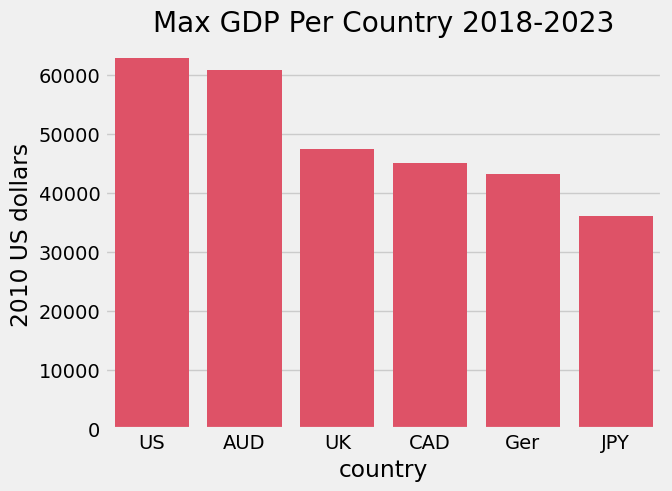

In [36]:
# let's vesualize with a bar plot these results
sns.barplot(x = max_gdp.index, y = max_gdp["max_gdp"], color = "#f53b57")
plt.title("Max GDP Per Country 2018-2023")
plt.ylabel("2010 US dollars")
plt.show()

**Now, where were the lower? and in what period of time for each country on this dataset?**

In [37]:
date_min = macro_data.xs(key = "gdp", level = 1, axis = 1).idxmin().sort_values()

lower_gdp = macro_data.xs(key = "gdp", level = 1, axis = 1).min().sort_values()

min_gdp = pd.concat([date_min, lower_gdp], 
                    axis = 1).rename(columns = {0 : "date", 1: "min_gdp"}).sort_values("min_gdp", ascending = False)

In [38]:
date_min

country
US    2020-01-01
UK    2020-01-01
Ger   2020-01-01
JPY   2020-01-01
CAD   2020-01-01
AUD   2020-01-01
dtype: datetime64[ns]

In [39]:
min_gdp

,date,min_gdp
country,,
US,2020-01-01,58451.606715
AUD,2020-01-01,58115.930668
CAD,2020-01-01,42366.487145
UK,2020-01-01,42098.602930
Ger,2020-01-01,41650.422713
JPY,2020-01-01,34603.265056


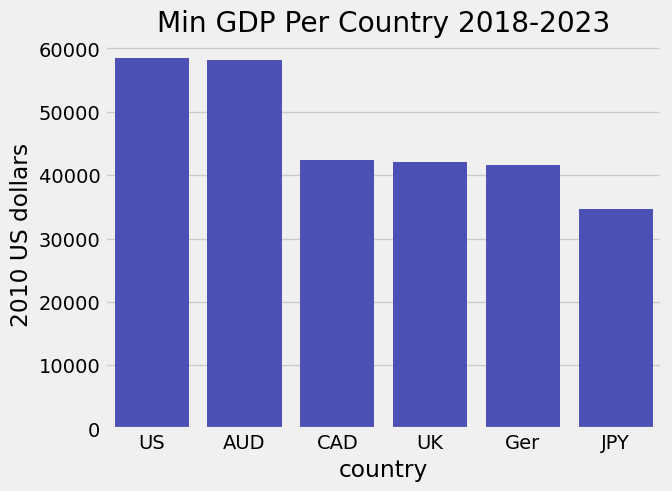

In [40]:
sns.barplot(x = min_gdp.index, y = min_gdp["min_gdp"], color = "#3c40c6")
plt.title("Min GDP Per Country 2018-2023")
plt.ylabel("2010 US dollars")
plt.show()

In [41]:
# here we can merge these two dataframes based on the country index.
# date_x is the date for the max_gdp and date_y is the date for the min_gdp.
both = pd.merge(max_gdp, min_gdp, on = "country", how = "outer")
both

,date_x,max_gdp,date_y,min_gdp
country,,,,
US,2022-01-01,62866.714391,2020-01-01,58451.606715
AUD,2022-01-01,60797.958648,2020-01-01,58115.930668
UK,2019-01-01,47491.594563,2020-01-01,42098.602930
CAD,2019-01-01,45113.066282,2020-01-01,42366.487145
Ger,2019-01-01,43284.602455,2020-01-01,41650.422713
JPY,2018-01-01,36138.529082,2020-01-01,34603.265056


**Looks like we have the same date for the lowest GDP for each country, it was in the year and month of the coronavirus pandemic**

# 2. Get the percentage of change of the GDP for all countries 2018-2023

**Nominal GDP: Market Value of all finished goods and services within a country in a year**

**Real GDP: adjusted for inflation**

**Real GDP Per Capita: Real GDP / Population size**

Maybe we can see who performed better in terms of percetange during that period of time according to the gdp.

We need to take in consideration the report of the GDP for these countries which is **anually**, so we need to resample this macro_data into a anual version with the resample() method in order to apply the percentage of change method.

In [42]:
# This is the normal version
macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("Y").mean()

country,US,UK,Ger,JPY,CAD,AUD
DATE,,,,,,
2018-12-31,59607.393660,47006.142927,42928.741237,36138.529082,44917.483728,58479.503547
2019-12-31,60698.011299,47491.594563,43284.602455,36043.784401,45113.066282,58868.480634
2020-12-31,58451.606715,42098.602930,41650.422713,34603.265056,42366.487145,58115.930668
2021-12-31,61829.845627,45334.157004,42726.485322,35507.578588,44234.542136,59339.684345
2022-12-31,62866.714391,47232.271808,43032.142085,36032.394442,44910.441728,60797.958648
2023-12-31,62866.714391,47232.271808,43032.142085,36032.394442,44910.441728,60797.958648


In [43]:
# This is the percentage change from the previous year version
# we used at the end pct_change() method 
macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("Y").mean().pct_change()

country,US,UK,Ger,JPY,CAD,AUD
DATE,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,0.018297,0.010327,0.008290,-0.002622,0.004354,0.006652
2020-12-31,-0.037010,-0.113557,-0.037754,-0.039966,-0.060882,-0.012784
2021-12-31,0.057795,0.076857,0.025836,0.026134,0.044093,0.021057
2022-12-31,0.016770,0.041869,0.007154,0.014780,0.015280,0.024575
2023-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
# let's set that information into a variable
gdp_change = macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("Y").mean().pct_change()

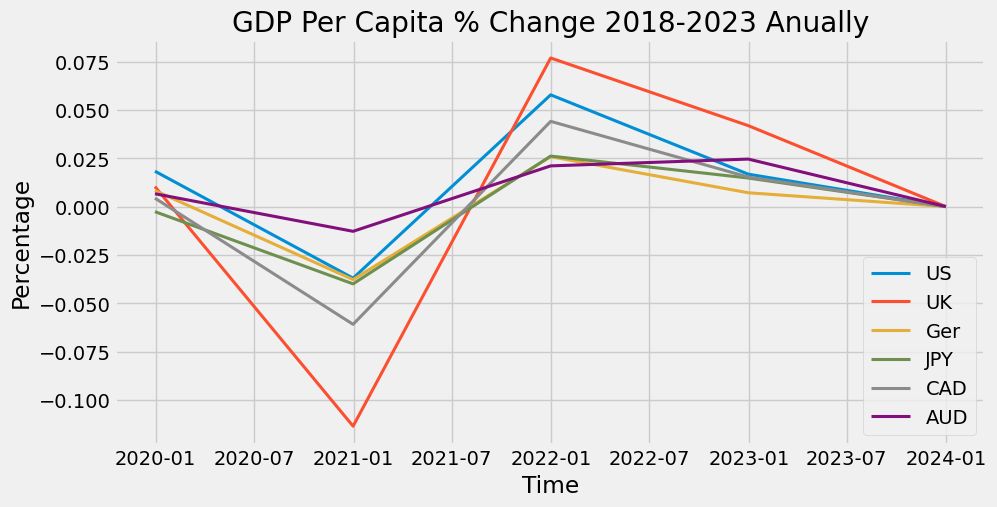

In [45]:
# we are going to use matplotlib here
plt.figure(figsize = (10,5))
plt.plot(gdp_change, label = tickers, linewidth = 2.2)

plt.title("GDP Per Capita % Change 2018-2023 Anually")
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.legend()

plt.show()

# **But what about the Real GDP for these countries in terms of US dollars?** 

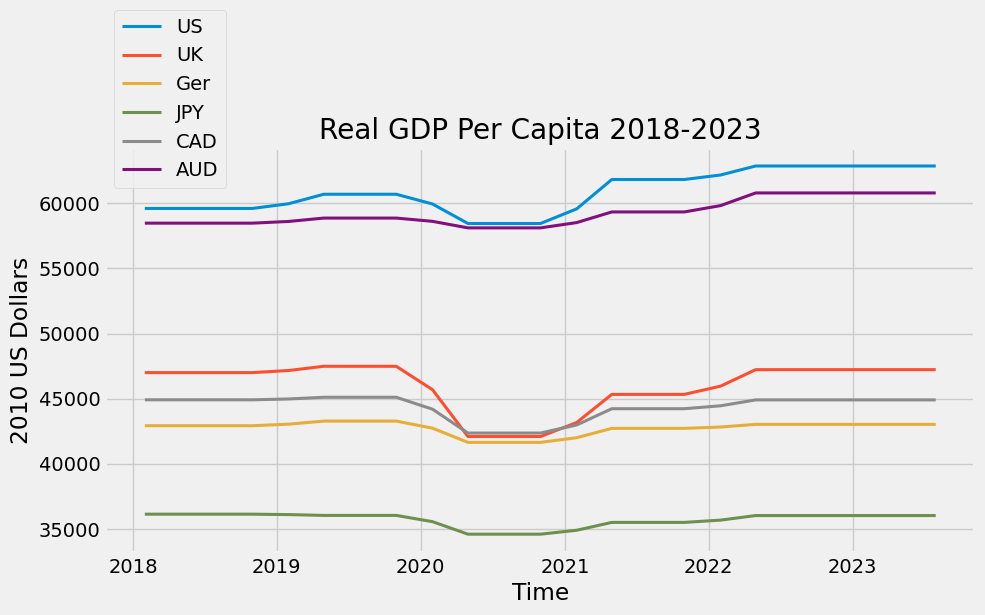

In [46]:
gdp_real = macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("3M").mean()

without_us = gdp_real[["UK", "JPY", "CAD", "AUD"]]

new_tickers = ["UK", "JPY", "CAD", "AUD"]

US = gdp_real["US"]
Ger = gdp_real["Ger"]

plt.figure(figsize = (10,5))
plt.plot(gdp_real, label = tickers, linewidth = 2.2)

plt.title("Real GDP Per Capita 2018-2023")
plt.xlabel("Time")
plt.ylabel("2010 US Dollars")
plt.legend(loc = (0.01, 0.9))

plt.show()

**It seen like we have three levels of performance regarding GDP per capita between the period of time 2018-2023**

**Let's plot for the US and Australia in this preiod of time 2018-2013.**

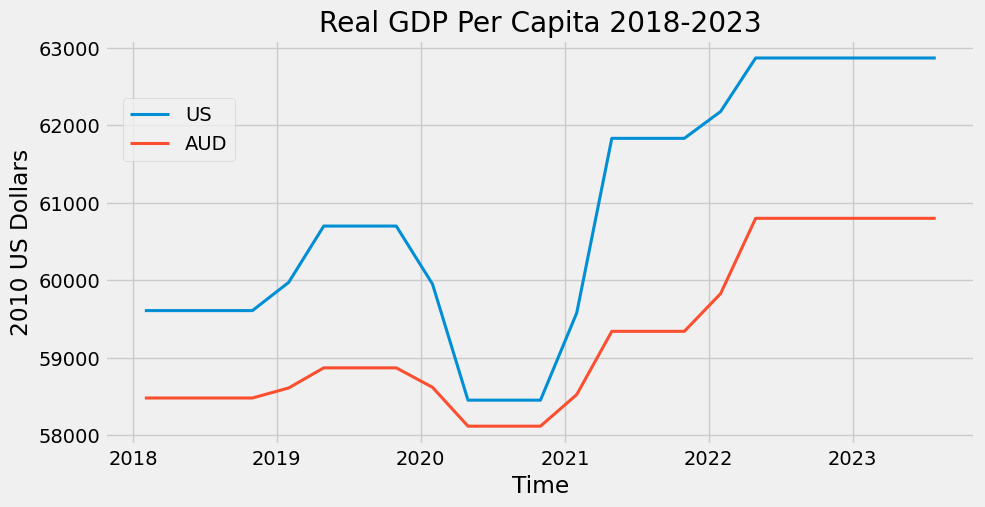

In [47]:
gdp_real = macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("3M").mean()

US_AUD = gdp_real[["US", "AUD"]]

new_tickers = ["US", "AUD"]

plt.figure(figsize = (10,5))
plt.plot(US_AUD, label = new_tickers, linewidth = 2.2)

plt.title("Real GDP Per Capita 2018-2023")
plt.xlabel("Time")
plt.ylabel("2010 US Dollars")
plt.legend(loc = (0.02, 0.7))

plt.show()

**Let's plot it for UK Germany and Canada only**

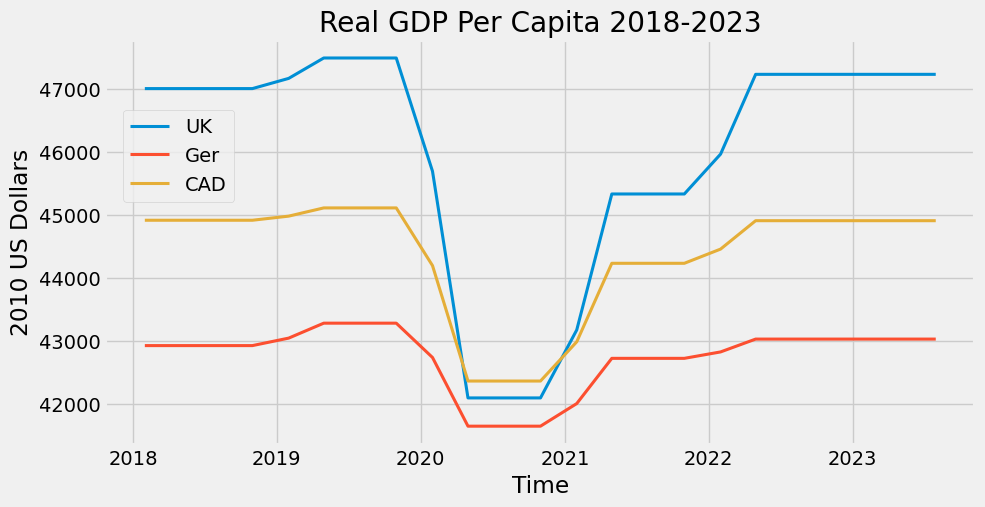

In [48]:
gdp_real = macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("3M").mean()

UK_Ger_CAD = gdp_real[["UK", "Ger", "CAD"]]

new_tickers = ["UK", "Ger", "CAD"]

plt.figure(figsize = (10,5))
plt.plot(UK_Ger_CAD, label = new_tickers, linewidth = 2.2)

plt.title("Real GDP Per Capita 2018-2023")
plt.xlabel("Time")
plt.ylabel("2010 US Dollars")
plt.legend(loc = (0.02, 0.6))

plt.show()

**Let's plot it for Japan Only** 

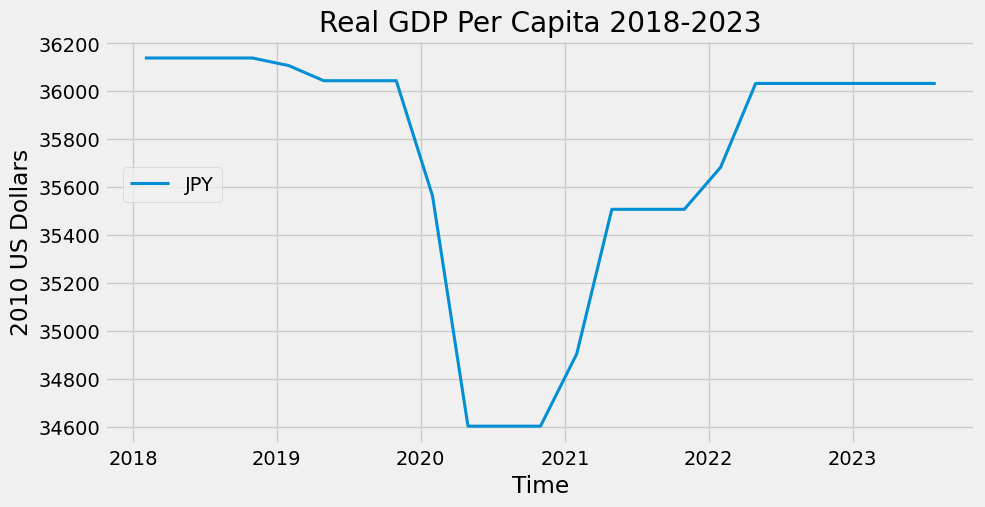

In [49]:
gdp_real = macro_data.xs(key = "gdp", level = "indicators", axis = 1).resample("3M").mean()

JPY = gdp_real["JPY"]

new_tickers = "JPY"

plt.figure(figsize = (10,5))
plt.plot(JPY, label = new_tickers, linewidth = 2.2)

plt.title("Real GDP Per Capita 2018-2023")
plt.xlabel("Time")
plt.ylabel("2010 US Dollars")
plt.legend(loc = (0.02, 0.6))

plt.show()

# 3. Correlation of the GDP growth for these countries.

**what does affect the growth of a country mostly?**

Let's apply a heatmap to see the correlations of the GDPs for these countries, as we are going to see these countries are highly correlated, but what about the correlation for the other economic indicators? for a country like the UK for example? 

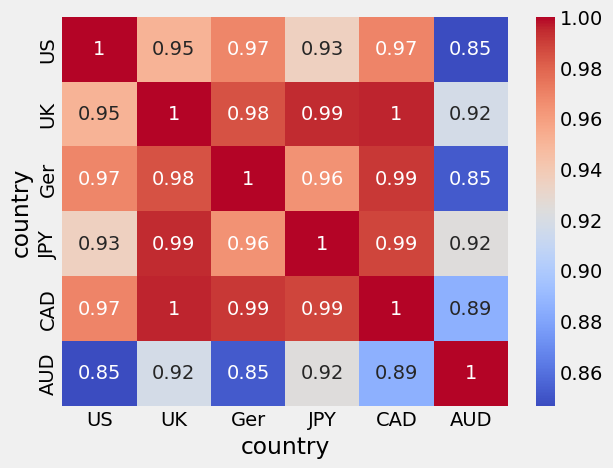

In [50]:
# correlation of GDPs % growth for each country with another country
sns.heatmap(gdp_change.corr(), annot = True, cmap = "coolwarm")
plt.show()

**Let's take the example of the uk**

In [51]:
corr_gdp_uk = macro_data["UK"].resample("Y").mean().corr()

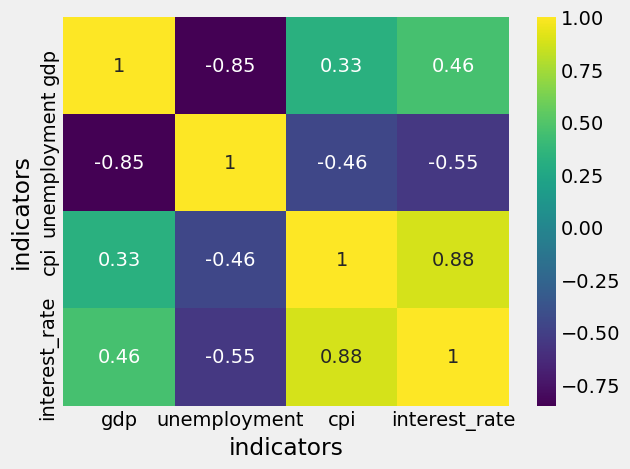

In [52]:
sns.heatmap(corr_gdp_uk, cmap = "viridis", annot = True)
plt.show()

It is the interest rate the most correlated indicator at least for the UK but despite this, it does not reach the 50%, by the other side the growth of the GDP for the UK is very sensible to unemployment. What about Australia?

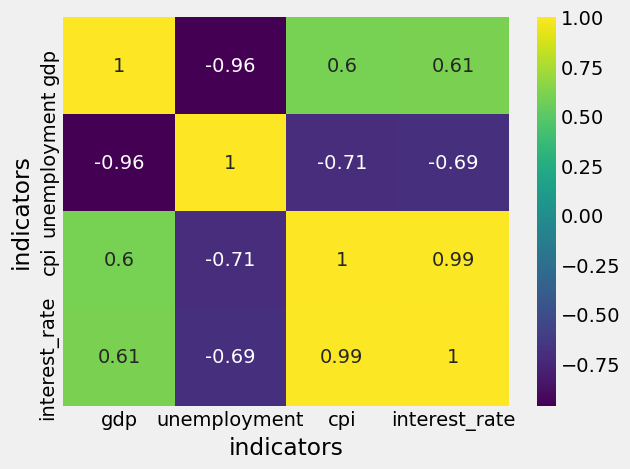

In [53]:
corr_gdp_aud = macro_data["AUD"].resample("Y").mean().corr()
sns.heatmap(corr_gdp_aud, cmap = "viridis", annot = True)
plt.show()

In australia GDP with CPI and Interest Rates are highly positive correlated, even more than the UK, and in this country the sensibility to unemployment that affect the GDP growth is higher than the UK in a negative way too.

# 4. Which is the most affected country by fiscal policies?

In order to know this we need to see which is the most correlated country in interest rates terms.

In [54]:
# we applied with Australia the correlation matrix
corr_gdp_aud

indicators,gdp,unemployment,cpi,interest_rate
indicators,,,,
gdp,1.000000,-0.961608,0.600858,0.608645
unemployment,-0.961608,1.000000,-0.709071,-0.689016
cpi,0.600858,-0.709071,1.000000,0.987944
interest_rate,0.608645,-0.689016,0.987944,1.000000


In [55]:
# We can grab the desired information from the heatmap table with the loc index selection
corr_gdp_aud.loc["interest_rate", "gdp"]

0.6086445680061343

We are going to extract only the values correlated with interest rates regarding gdp.

In [56]:
# count is the variable we are going to set 
count = 6

# this is the index of the list we are going to increase with the tickers list
index = 0

# this is the list for each interest rate correlation with the gdp per country
country_interest_corr = []

# we are going to append the current ticker in this list
country = []

# we are going to count until six in this while loop because it is the lenght of the tickers
# we can use len(tickers) but this time i decided to do it in this way. 
while count > 0:
    
    #select the ticker index
    ticker = tickers[index]
    
    # apply the correlation to create the matrix between these 4 features
    current_corr = macro_data[ticker].resample("Y").mean().corr()
    
    #select only the index of interest rates
    current_corr = current_corr.loc["interest_rate", "gdp"]
    
    #append current value of interest rates correlated into a list
    country_interest_corr.append(current_corr)
    
    # append the current ticker into a list for the country
    country.append(ticker)
    
    # reduce the value of the count until we end the loop
    count -= 1
    
    # increase the index to change the ticker.
    index += 1

# create a dictionary where we will have two columns for a future dataframe
dictionary = {"corr_interest": country_interest_corr, "country": country}

# create a dataframe where we are going to have the correlation of interest rates and country
pd.DataFrame(dictionary)

,corr_interest,country
0,0.490563,US
1,0.455040,UK
2,0.285871,Ger
3,NaN,JPY
4,0.503654,CAD
5,0.608645,AUD


Something strange happened with the JPY.

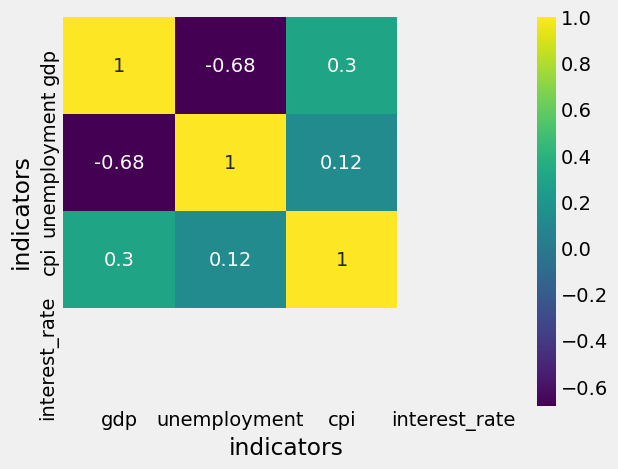

In [57]:
corr_gdp_jpy = macro_data["JPY"].resample("Y").mean().corr()
sns.heatmap(corr_gdp_jpy, cmap = "viridis", annot = True)
plt.show()

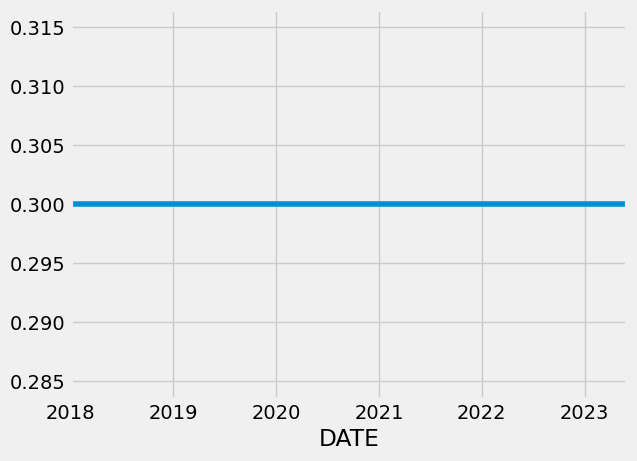

In [58]:
macro_data["JPY"]["interest_rate"].plot()
plt.show()

**Japanese have had an interest bank rate very stable which means that there is no correlation in this period of time 2018-2023.**

In [59]:
interest_corr = pd.DataFrame(dictionary)

interest_corr.loc[3, "corr_interest"] = 0

interest_corr

,corr_interest,country
0,0.490563,US
1,0.455040,UK
2,0.285871,Ger
3,0.000000,JPY
4,0.503654,CAD
5,0.608645,AUD


**Let's plot the correlation with interest rates for each country and how does this affect the GDP.**

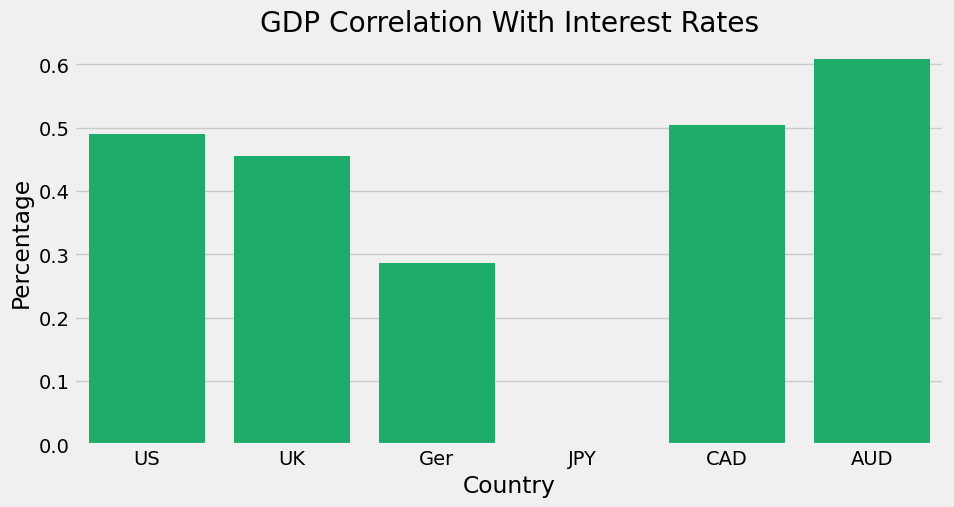

In [60]:
plt.figure(figsize = (10,5))
sns.barplot(x = interest_corr["country"], y = interest_corr["corr_interest"], color = "#05c46b")
plt.title("GDP Correlation With Interest Rates")
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.show()

**Looks like  Australia and Canada in that period of time were the most correlated countries with interest rates regarding GDP**

# 5 Correlation  of GDP with unemployment and CPI too.

We are going to apply the same technique but this time for CPI and unemployment

In [61]:
count = 6
index = 0
country_unemployment_corr = []
country_cpi_corr = []
country = []


while count > 0:
    
    ticker = tickers[index]
    current_corr = macro_data[ticker].resample("3M").mean().corr()
    
    # here we grab the correlation of unemployment
    current_unemployment = current_corr.loc["unemployment", "gdp"]
    country_unemployment_corr.append(current_unemployment)
    
    # here we grab the correlation of CPI
    current_cpi = current_corr.loc["cpi", "gdp"]
    country_cpi_corr.append(current_cpi)
    
    country.append(ticker)
    
    count -= 1
    index += 1

dictionary = {"corr_unemployment": country_unemployment_corr, "corr_cpi": country_cpi_corr, "country": country}

pd.DataFrame(dictionary)

,corr_unemployment,corr_cpi,country
0,-0.559036,0.858252,US
1,-0.692346,0.268859,UK
2,-0.686058,0.240863,Ger
3,-0.604253,0.216699,JPY
4,-0.907574,0.208650,CAD
5,-0.887790,0.462080,AUD


In [62]:
corr_unemployment_cpi = pd.DataFrame(dictionary)

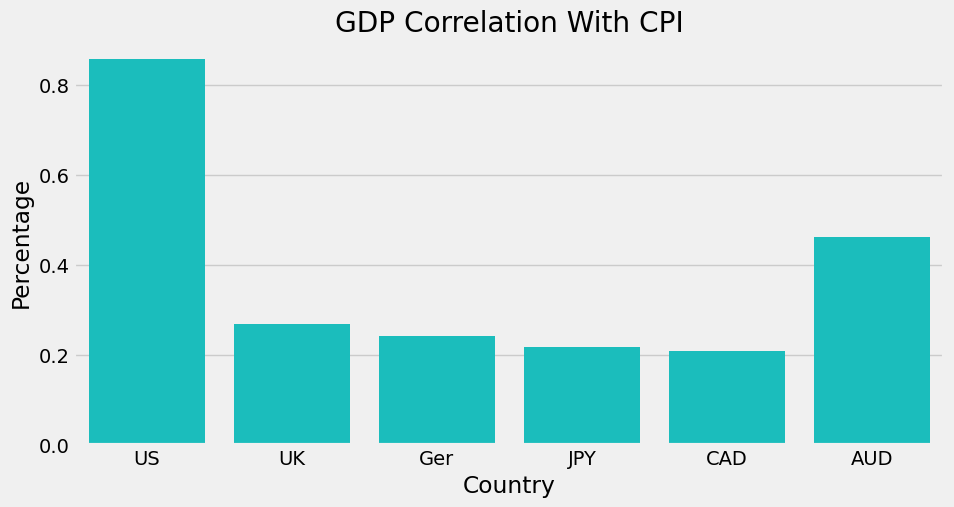

In [63]:
plt.figure(figsize = (10,5))
sns.barplot(x = corr_unemployment_cpi["country"], y = corr_unemployment_cpi["corr_cpi"], color = "#00d8d6")
plt.title("GDP Correlation With CPI")
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.show()

**With the CPI the US is the most sensible to growth in GDP compared to the other countries in this period of time 2018-2023**

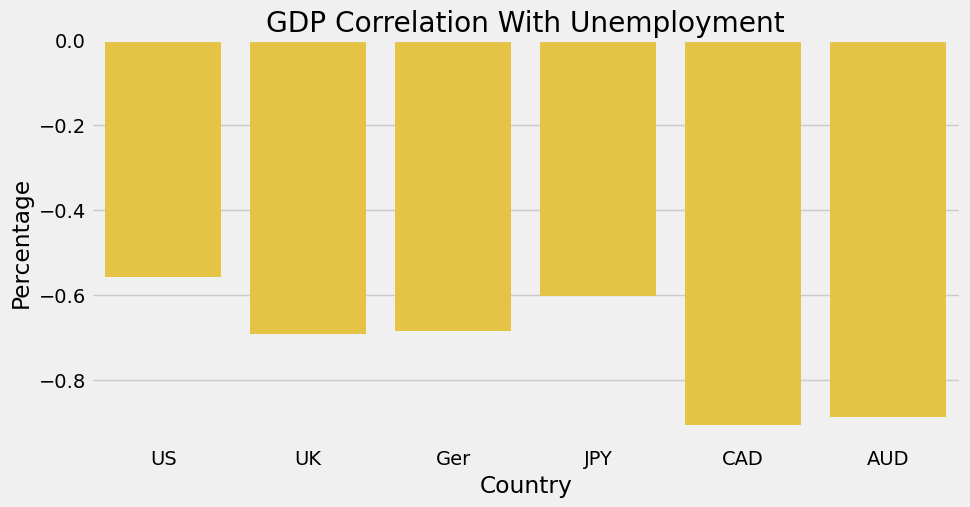

In [64]:
plt.figure(figsize = (10,5))
sns.barplot(x = corr_unemployment_cpi["country"], y = corr_unemployment_cpi["corr_unemployment"], color = "#ffd32a" )
plt.title("GDP Correlation With Unemployment")
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.show()

**Here in unemployment as in interest rates Canada and Australia are the most sensible to stop growing in GDP per capita when they have high levels of unemployment** 

# 6. Comparing US with China unemployment during the time period of 2018-2023.

We are going to compare on a monthly basis the unemployment during 2018-2023 between US and China and after that we are going to compare the unemployment of these two countires on a yearly basis:

1. We are going to need to resample the data of the China unemployment which is on a yearly basis into a monthly basis to match it with the US data.
2. We are going to resample the US unemployment data on a yearly basis to match it with the China data. 

In [65]:
# extracting the unemployment data from China on the world bank webpage
# we use the datareader module as wb and applied the download() method
unemp_china = wb.download(indicator='SL.UEM.TOTL.ZS', country="CN", start=2018, end=2023).loc["China"]

# we set the index into a datetime format because it was in a string format
unemp_china.index = pd.to_datetime(unemp_china.index)

# now we resample the data into a monthly basis with the missing values replaced by the mean
unemp_china.resample("M").mean().fillna(method = "ffill").head()

,SL.UEM.TOTL.ZS
year,
2018-01-31,4.31
2018-02-28,4.31
2018-03-31,4.31
2018-04-30,4.31
2018-05-31,4.31


In [66]:
# we assign this into a variable and pay attention to the shape
unemp_china = unemp_china.resample("M").mean().fillna(method = "ffill")
unemp_china.shape

(49, 1)

In [67]:
# we use loc to select the range of time that matches with the china unemployment monthly data
# pay attention to the shape of the US and the above China shape data, it is the same
data_us["unemployment"].loc[:"2022-01-31"].shape

(49,)

In [68]:
# we assign this range of date data into a variable and we have a Series. 
unemp_us = data_us["unemployment"].loc[:"2022-01-31"]
unemp_us.head()

DATE
2018-01-01    4.0
2018-02-01    4.1
2018-03-01    4.0
2018-04-01    4.0
2018-05-01    3.8
Freq: MS, Name: unemployment, dtype: float64

In [69]:
# let's concat the dataframe of China and the Series of the US
china_us_unemp = pd.concat([unemp_china, unemp_us], axis = 1)

# We are going to fill the missing values with the previous ones
china_us_unemp = china_us_unemp.fillna(method = "ffill")

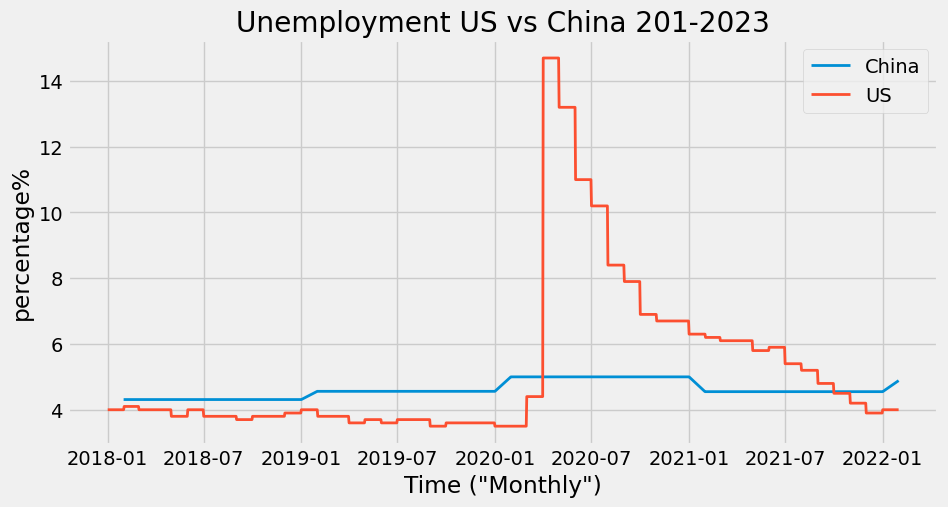

In [70]:
# plotting the data
plt.figure(figsize = (10, 5))
plt.plot(china_us_unemp, linewidth = 2, label = ["China", "US"])
plt.title("Unemployment US vs China 201-2023")
plt.xlabel('Time ("Monthly")')
plt.ylabel("percentage%")
plt.legend()
plt.show()

According to this data the unemployment of China did not increased as much as the US unemployment. 

**Now it is time to plot the data on a yearly basis**

In [71]:
unemp_china = wb.download(indicator='SL.UEM.TOTL.ZS', country="CN", start=2018, end=2023).loc["China"]

# China's unemployment is already on a yearly basis
# but we need to change the index into a datetime format
unemp_china.index = pd.to_datetime(unemp_china.index)

unemp_china

,SL.UEM.TOTL.ZS
year,
2022-01-01,4.886
2021-01-01,4.550
2020-01-01,5.000
2019-01-01,4.560
2018-01-01,4.310


In [72]:
# now we need to resample the US unemployment into a Yearly basis 
# we are going to reduce from monthly to yearly and we are going to use the mean for each year
unemp_us = data_us["unemployment"].resample("Y").mean()

unemp_us

DATE
2018-12-31    3.891667
2019-12-31    3.683333
2020-12-31    8.091667
2021-12-31    5.366667
2022-12-31    3.641667
2023-12-31    3.533333
Freq: A-DEC, Name: unemployment, dtype: float64

In [73]:
# now that both datasets are on a yearly basis we can concatenate
unemp_yearly = pd.concat([unemp_us, unemp_china], axis = 1)

# we are going to fill the missing values with the previous one
unemp_yearly = unemp_yearly.fillna(method = "ffill")

# we are going to rename the columns
unemp_yearly = unemp_yearly.rename(columns = {"unemployment" : "US_unemp", "SL.UEM.TOTL.ZS": "China_unemp"})

unemp_yearly

,US_unemp,China_unemp
2018-01-01,NaN,4.310
2018-12-31,3.891667,4.310
2019-01-01,3.891667,4.560
2019-12-31,3.683333,4.560
2020-01-01,3.683333,5.000
2020-12-31,8.091667,5.000
2021-01-01,8.091667,4.550
2021-12-31,5.366667,4.550
2022-01-01,5.366667,4.886
2022-12-31,3.641667,4.886


In [74]:
unemp_yearly.loc["2018-01-01", "US_unemp"] = unemp_yearly.loc["2018-12-31", "US_unemp"]

unemp_yearly

,US_unemp,China_unemp
2018-01-01,3.891667,4.310
2018-12-31,3.891667,4.310
2019-01-01,3.891667,4.560
2019-12-31,3.683333,4.560
2020-01-01,3.683333,5.000
2020-12-31,8.091667,5.000
2021-01-01,8.091667,4.550
2021-12-31,5.366667,4.550
2022-01-01,5.366667,4.886
2022-12-31,3.641667,4.886


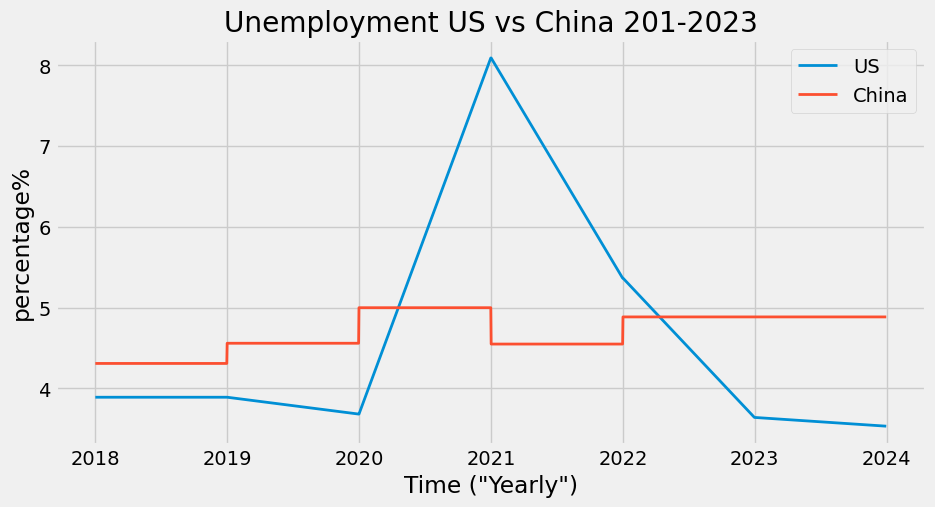

In [75]:
# plotting the data
plt.figure(figsize = (10, 5))
plt.plot(unemp_yearly, linewidth = 2, label = ["US", "China"])
plt.title("Unemployment US vs China 201-2023")
plt.xlabel('Time ("Yearly")')
plt.ylabel("percentage%")
plt.legend()
plt.show()

**This time we appreciated the unemployment between China and the US on a Yearly basis**

# 7. How about the GDP between India and the UK yearly?

In [76]:
# this is the gdp for the uk on a yearly basis.
uk_gdp = data_uk["gdp"].resample("Y").mean()

In [77]:
# apply the function at the beginning of the code to rename the columns and fill missing values
# the GDP of India is grabed from the FRED webpage.
data_india = clean_data(data_india)

# we are going to resample the data on a yearly basis and to take only the GDP 
india_gdp = data_india["gdp"].resample("Y").mean()

In [78]:
# let's concatenate these two datasets togerther
uk_india = pd.concat([uk_gdp, india_gdp], axis = 1)

# let's rename the columns
uk_india = uk_india.rename(columns = {"gdp": "uk_gdp", "gdp" : "india_gdp"})

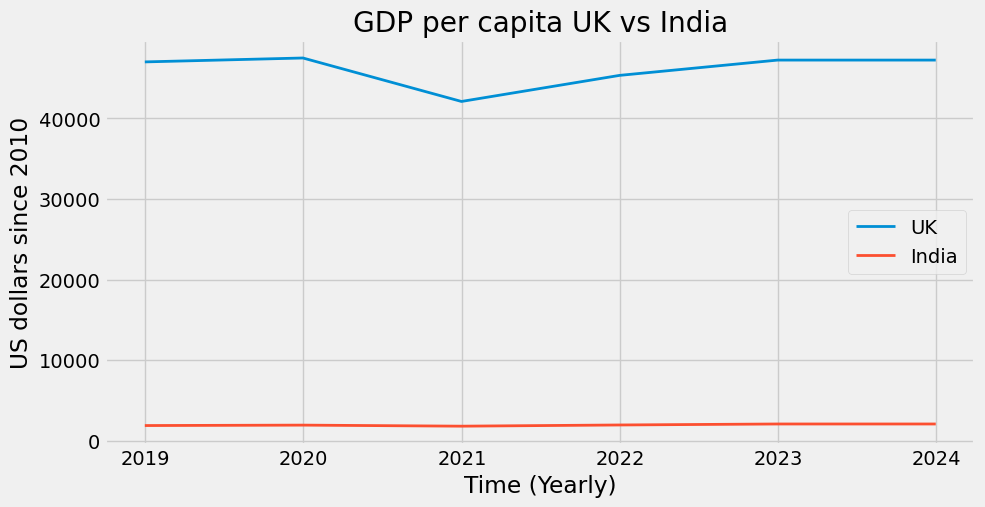

In [79]:
# now we are going to plot a chart
plt.figure(figsize = (10, 5))
plt.plot(uk_india, label = ["UK", "India"], linewidth = 2)
plt.title("GDP per capita UK vs India")
plt.xlabel("Time (Yearly)")
plt.ylabel("US dollars since 2010")
plt.legend()
plt.show()

**The difference in GDP per capita between these two countries is very big, how much on average?**

In [80]:
india_gdp.mean()

1963.5318080120198

In [81]:
uk_gdp.mean()

46065.84017334032

In [82]:
uk_gdp.mean() - india_gdp.mean()

44102.3083653283

44 102$ is on average the difference between the gdp of India and the UK from 2018-2023.

But what about the unemployment? 

# 8. Unemployment between India and the UK.

We are going to apply similar steps in this case as we did comparing the GDP between UK and India. 

In [83]:
# This is the unemployment rates for india on the world bank webpage
wb.download(indicator = "SL.UEM.TOTL.ZS", country = "IN", start = 2018, end = 2022)

SL.UEM.TOTL.ZS
country year                
India   2022           7.330
        2021           7.713
        2020          10.195
        2019           6.510
        2018           7.650

In [84]:
# we are going to set it into a variable and use the loc to access to the inner level of the index
unemp_india = wb.download(indicator = "SL.UEM.TOTL.ZS", country = "IN", start = 2018, end = 2022).loc["India"]

# we are going to convert the index into a date time to use it as a time series data
unemp_india.index = pd.to_datetime(unemp_india.index)

unemp_india

,SL.UEM.TOTL.ZS
year,
2022-01-01,7.330
2021-01-01,7.713
2020-01-01,10.195
2019-01-01,6.510
2018-01-01,7.650


In [85]:
# now we are going to select the uk unemployment data and we are going to resample it into a yearly basis.
unemp_uk = data_uk["unemployment"].resample("Y").mean()

unemp_uk

DATE
2018-12-31    4.075000
2019-12-31    3.833333
2020-12-31    4.550000
2021-12-31    4.508333
2022-12-31    3.700000
2023-12-31    3.880000
Freq: A-DEC, Name: unemployment, dtype: float64

In [86]:
# let's concatenate
uk_india_unemp = pd.concat([unemp_uk, unemp_india], axis = 1).fillna(method = "ffill")

# we are going to replace the missing value of the beginning of the Uk unemployment dataset which is the same as the second
uk_india_unemp.loc["2018-01-01", "unemployment"] = uk_india_unemp.loc["2018-12-31", "unemployment"]

# the first column is for the uk unemployment and the second for India
uk_india_unemp

,unemployment,SL.UEM.TOTL.ZS
2018-01-01,4.075000,7.650
2018-12-31,4.075000,7.650
2019-01-01,4.075000,6.510
2019-12-31,3.833333,6.510
2020-01-01,3.833333,10.195
2020-12-31,4.550000,10.195
2021-01-01,4.550000,7.713
2021-12-31,4.508333,7.713
2022-01-01,4.508333,7.330
2022-12-31,3.700000,7.330


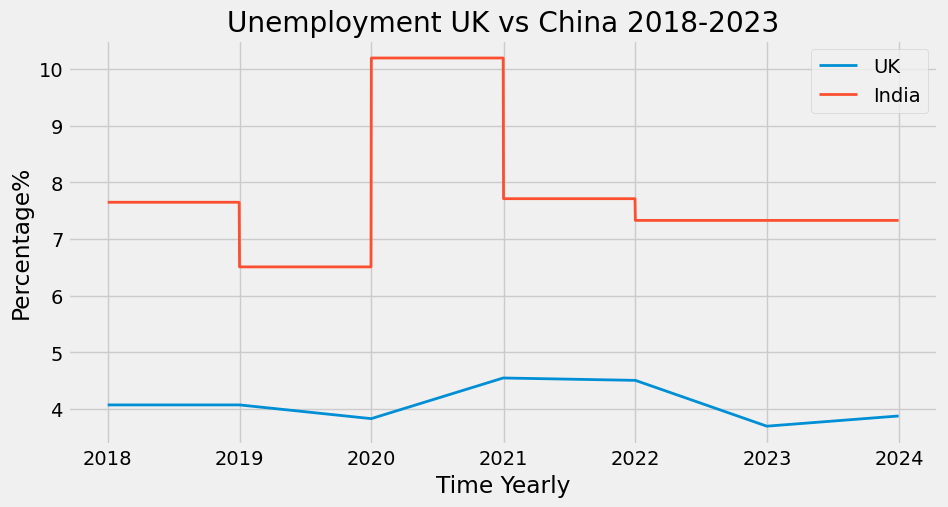

In [87]:
# we are going to visualize this information
plt.figure(figsize = (10, 5))
plt.plot(uk_india_unemp, label = ["UK", "India"], linewidth = 2)
plt.title("Unemployment UK vs China 2018-2023")
plt.xlabel("Time Yearly")
plt.ylabel("Percentage%")
plt.legend()
plt.show()

**Look's like by far the UK is doing better than India reagrding unemployment.**

# 9. Consumer price Index During time period of 2018-2023.

This is a video where it is explained how to measure the inflation with CPI: https://www.youtube.com/watch?v=0jJKjgE3qfE&list=PL-uRhZ_p-BM52EbMG1NR1ZfG9tEvcxE4u&index=45

**Who did it better with the CPI during the time period of 2018-2023 Germany, the Uk or the US?**

In the link video we can study the below formula. 

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [96]:
ger_cpi = data_germany["cpi"]

In [97]:
# we need to apply the percentage of change 
us_cpi = data_us["cpi"].pct_change() * 100

In [98]:
# we need to apply the percentage of change 
uk_cpi = data_uk["cpi"].pct_change() * 100

In [107]:
# renaming the columns of these series
ger_cpi = ger_cpi.rename("cpi_germany")
us_cpi = us_cpi.rename("cpi_us")
uk_cpi = uk_cpi.rename("cpi_uk")

In [112]:
# filling the first row with the following row because as we applied pct() method there was nothing before to compare to
us_cpi.loc["2018-01-01"] = us_cpi.loc["2018-02-01"]
uk_cpi.loc["2018-01-01"] = uk_cpi.loc["2018-02-01"]

In [120]:
# we applied the concatenation filling the missing values and resampling methods with the mean on a monthly basis
pd.concat([ger_cpi, us_cpi, uk_cpi], axis = 1).fillna(method = "ffill").resample("M").mean().head()

,cpi_germany,cpi_us,cpi_uk
DATE,,,
2018-01-31,-0.584795,0.269229,0.382775
2018-02-28,0.294118,0.269229,0.382775
2018-03-31,0.586510,0.019236,0.190658
2018-04-30,0.194363,0.260441,0.380590
2018-05-31,0.775946,0.225795,0.379147


In [119]:
# let's apply those changes into a variable
cpi_three = pd.concat([ger_cpi, us_cpi, uk_cpi], axis = 1).fillna(method = "ffill").resample("M").mean()

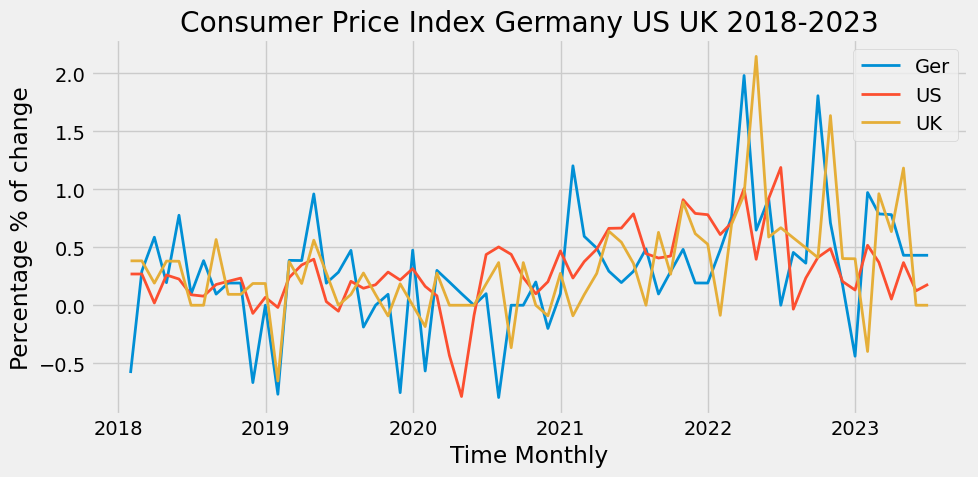

In [127]:
# we are going to plot these three time series data
plt.figure(figsize = (10, 5))
plt.plot(cpi_three, linewidth = 2, label = ["Ger", "US", "UK"])
plt.title("Consumer Price Index Germany US UK 2018-2023")
plt.xlabel("Time Monthly")
plt.ylabel("Percentage % of change")
plt.legend()
plt.tight_layout()
plt.show()

**Looks like the UK did it pretty good between 2020 and 2021 with the coronavirus regarding the % of change in its consumer price index than US and Germany.**